In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 5.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
import emoji

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/tayang.csv'

Mounted at /content/drive


In [ ]:
df = pd.read_csv(file_path)
df

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7
...,...,...,...,...,...
395,396,negative,MataNajwaMetroTV,0,ini apa banget deh gw paling kesel klo orang2 ...
396,397,negative,MataNajwaMetroTV,0,Orang miskin semakin miskin klo sekolah melaku...
397,398,negative,MataNajwaMetroTV,0,"ga boLeh emosi, cepat tua, nonton #matanajwame..."
398,399,negative,MataNajwaMetroTV,0,dr penampilan saja kyk preman taunya bkin kisr...


In [ ]:
text = df[['Text Tweet']]
text

,Text Tweet
0,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,Selamat berbuka puasa Semoga amal ibadah hari ...
2,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,selamat ya mas @adietaufan masuk hitamputih
4,Asiknya nonton Hitam Putih Trans7
...,...
395,ini apa banget deh gw paling kesel klo orang2 ...
396,Orang miskin semakin miskin klo sekolah melaku...
397,"ga boLeh emosi, cepat tua, nonton #matanajwame..."
398,dr penampilan saja kyk preman taunya bkin kisr...


In [ ]:
df.shape

(400, 5)

In [ ]:
df = df.drop_duplicates(subset=['Text Tweet'])

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Id                0
Sentiment         0
Acara TV          0
Jumlah Retweet    0
Text Tweet        0
dtype: int64

In [ ]:
df.dtypes

Id                 int64
Sentiment         object
Acara TV          object
Jumlah Retweet     int64
Text Tweet        object
dtype: object

In [ ]:
def cleanTweets(text):
    text = re.sub('@\w+', '', text)                                # Menghapus Username
    text = re.sub('https?:\/\/\S+', '', text)                       # Menghapus Link
    text = re.sub('[^a-zA-Z]', ' ', str(text).lower().strip())      # Lower Case setiap kata
    text = re.sub('#','',text)                                      # Hanya menghapus simbol hastag
    text = re.sub('\d+', '', text)                                  # Menghapus angka
    text = re.sub('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]+','', text)  # Menghapus simbol-simbol beserta string selanjutnya
    text = re.sub('RT[\s]+','',text)                                # Menghapus kata yang memiliki "retweet / RT"
    text = re.sub('\n',' ',text)                                    # Menghapus newline
    text = emoji.replace_emoji(text, replace='')                    # Menghapus emoji atau emoticon
    return text

# Assuming df is your dataframe and 'Text Tweet' is the column to be cleaned
text['Cleaned Tweet'] = text['Text Tweet'].apply(cleanTweets)

print(text[['Text Tweet', 'Cleaned Tweet']])

                                            Text Tweet  \
0    Undang @N_ShaniJKT48 ke hitamputih, pemenang S...   
1    Selamat berbuka puasa Semoga amal ibadah hari ...   
2    Ada nih di trans7 hitam putih, dia dpt penghar...   
3          selamat ya mas @adietaufan masuk hitamputih   
4                    Asiknya nonton Hitam Putih Trans7   
..                                                 ...   
395  ini apa banget deh gw paling kesel klo orang2 ...   
396  Orang miskin semakin miskin klo sekolah melaku...   
397  ga boLeh emosi, cepat tua, nonton #matanajwame...   
398  dr penampilan saja kyk preman taunya bkin kisr...   
399  Jawab aja ga usah berbelit-belit. Muter2 ga je...   

                                         Cleaned Tweet  
0    undang  ke hitamputih  pemenang ssk jkt   haru...  
1    selamat berbuka puasa semoga amal ibadah hari ...  
2    ada nih di trans  hitam putih  dia dpt penghar...  
3                     selamat ya mas  masuk hitamputih  
4                 

<ipython-input-11-2d922e98f0c4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['Cleaned Tweet'] = text['Text Tweet'].apply(cleanTweets)


In [ ]:
text.head(10)

,Text Tweet,Cleaned Tweet
0,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S...",undang ke hitamputih pemenang ssk jkt haru...
1,Selamat berbuka puasa Semoga amal ibadah hari ...,selamat berbuka puasa semoga amal ibadah hari ...
2,"Ada nih di trans7 hitam putih, dia dpt penghar...",ada nih di trans hitam putih dia dpt penghar...
3,selamat ya mas @adietaufan masuk hitamputih,selamat ya mas masuk hitamputih
4,Asiknya nonton Hitam Putih Trans7,asiknya nonton hitam putih trans
5,@TRANS7 acara paling komplit dan menarik apala...,acara paling komplit dan menarik apalagi ada h...
6,hitam putih T7 inspiratif banget,hitam putih t inspiratif banget
7,Suka banget dengan acara hitam putih,suka banget dengan acara hitam putih
8,Keren lu bro #HitamPutihTrans7,keren lu bro hitamputihtrans
9,"Tadi ada yg liat hitam putih di trans7 ga, Ada...",tadi ada yg liat hitam putih di trans ga ada...


## Data Preprocessing

Normalisasi

In [ ]:
norm = {"dpt" : "dapat", "utk" : "untuk", "ttg" : "tentang", "slalu" : "selalu", "hbs" : "habis", "lg" : "lagi",
        "donk" : "dong", "dr" : "dari", "pd" : "pada", "gt" : "gitu", "yg" : "yang", "tdk" : "tidak", "sbg" : "sebagai",
        "knp" : "kenapa", "ditindes" : "ditindas", "trus" : "terus", "slalu" : "selalu", "krn" : "karena", "org" : "orang",
        "semga" : "semoga", "pd" : "pada", "kyk" : "kayak", "klo" : "kalo"}

def normalisasi(kalimat):
  for i in norm :
    kalimat = kalimat.replace(i, norm[i])
  return kalimat


text['Normalized Tweet'] = text['Cleaned Tweet'].apply(normalisasi)

text.head(10)

<ipython-input-13-c2fd7ac164ae>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['Normalized Tweet'] = text['Cleaned Tweet'].apply(normalisasi)


,Text Tweet,Cleaned Tweet,Normalized Tweet
0,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S...",undang ke hitamputih pemenang ssk jkt haru...,undang ke hitamputih pemenang ssk jkt haru...
1,Selamat berbuka puasa Semoga amal ibadah hari ...,selamat berbuka puasa semoga amal ibadah hari ...,selamat berbuka puasa semoga amal ibadah hari ...
2,"Ada nih di trans7 hitam putih, dia dpt penghar...",ada nih di trans hitam putih dia dpt penghar...,ada nih di trans hitam putih dia dapat pengh...
3,selamat ya mas @adietaufan masuk hitamputih,selamat ya mas masuk hitamputih,selamat ya mas masuk hitamputih
4,Asiknya nonton Hitam Putih Trans7,asiknya nonton hitam putih trans,asiknya nonton hitam putih trans
5,@TRANS7 acara paling komplit dan menarik apala...,acara paling komplit dan menarik apalagi ada h...,acara paling komplit dan menarik apalagi ada h...
6,hitam putih T7 inspiratif banget,hitam putih t inspiratif banget,hitam putih t inspiratif banget
7,Suka banget dengan acara hitam putih,suka banget dengan acara hitam putih,suka banget dengan acara hitam putih
8,Keren lu bro #HitamPutihTrans7,keren lu bro hitamputihtrans,keren lu bro hitamputihtrans
9,"Tadi ada yg liat hitam putih di trans7 ga, Ada...",tadi ada yg liat hitam putih di trans ga ada...,tadi ada yang liat hitam putih di trans ga a...


In [ ]:
text['token']= text['Normalized Tweet'].apply(lambda x:x.split())
text.head(10)

<ipython-input-14-793cb5bddd16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['token']= text['Normalized Tweet'].apply(lambda x:x.split())


,Text Tweet,Cleaned Tweet,Normalized Tweet,token
0,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S...",undang ke hitamputih pemenang ssk jkt haru...,undang ke hitamputih pemenang ssk jkt haru...,"[undang, ke, hitamputih, pemenang, ssk, jkt, h..."
1,Selamat berbuka puasa Semoga amal ibadah hari ...,selamat berbuka puasa semoga amal ibadah hari ...,selamat berbuka puasa semoga amal ibadah hari ...,"[selamat, berbuka, puasa, semoga, amal, ibadah..."
2,"Ada nih di trans7 hitam putih, dia dpt penghar...",ada nih di trans hitam putih dia dpt penghar...,ada nih di trans hitam putih dia dapat pengh...,"[ada, nih, di, trans, hitam, putih, dia, dapat..."
3,selamat ya mas @adietaufan masuk hitamputih,selamat ya mas masuk hitamputih,selamat ya mas masuk hitamputih,"[selamat, ya, mas, masuk, hitamputih]"
4,Asiknya nonton Hitam Putih Trans7,asiknya nonton hitam putih trans,asiknya nonton hitam putih trans,"[asiknya, nonton, hitam, putih, trans]"
5,@TRANS7 acara paling komplit dan menarik apala...,acara paling komplit dan menarik apalagi ada h...,acara paling komplit dan menarik apalagi ada h...,"[acara, paling, komplit, dan, menarik, apalagi..."
6,hitam putih T7 inspiratif banget,hitam putih t inspiratif banget,hitam putih t inspiratif banget,"[hitam, putih, t, inspiratif, banget]"
7,Suka banget dengan acara hitam putih,suka banget dengan acara hitam putih,suka banget dengan acara hitam putih,"[suka, banget, dengan, acara, hitam, putih]"
8,Keren lu bro #HitamPutihTrans7,keren lu bro hitamputihtrans,keren lu bro hitamputihtrans,"[keren, lu, bro, hitamputihtrans]"
9,"Tadi ada yg liat hitam putih di trans7 ga, Ada...",tadi ada yg liat hitam putih di trans ga ada...,tadi ada yang liat hitam putih di trans ga a...,"[tadi, ada, yang, liat, hitam, putih, di, tran..."


stopwords


In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

more_stop_words = ["sih"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)

stop_words_remover_new = StopWordRemover(new_array)

def stopword(token_list):
    filtered_tokens = [word for word in token_list if word not in stop_words]
    return filtered_tokens

text['stopword'] = text['token'].apply(lambda x: stopword(x))

text.head(10)

,Text Tweet,Cleaned Tweet,Normalized Tweet,token,stopword
0,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S...",undang ke hitamputih pemenang ssk jkt haru...,undang ke hitamputih pemenang ssk jkt haru...,"[undang, ke, hitamputih, pemenang, ssk, jkt, h...","[undang, hitamputih, pemenang, ssk, jkt, harus..."
1,Selamat berbuka puasa Semoga amal ibadah hari ...,selamat berbuka puasa semoga amal ibadah hari ...,selamat berbuka puasa semoga amal ibadah hari ...,"[selamat, berbuka, puasa, semoga, amal, ibadah...","[selamat, berbuka, puasa, semoga, amal, ibadah..."
2,"Ada nih di trans7 hitam putih, dia dpt penghar...",ada nih di trans hitam putih dia dpt penghar...,ada nih di trans hitam putih dia dapat pengh...,"[ada, nih, di, trans, hitam, putih, dia, dapat...","[nih, trans, hitam, putih, penghargaan, norweg..."
3,selamat ya mas @adietaufan masuk hitamputih,selamat ya mas masuk hitamputih,selamat ya mas masuk hitamputih,"[selamat, ya, mas, masuk, hitamputih]","[selamat, mas, masuk, hitamputih]"
4,Asiknya nonton Hitam Putih Trans7,asiknya nonton hitam putih trans,asiknya nonton hitam putih trans,"[asiknya, nonton, hitam, putih, trans]","[asiknya, nonton, hitam, putih, trans]"
5,@TRANS7 acara paling komplit dan menarik apala...,acara paling komplit dan menarik apalagi ada h...,acara paling komplit dan menarik apalagi ada h...,"[acara, paling, komplit, dan, menarik, apalagi...","[acara, paling, komplit, menarik, hitam, putih]"
6,hitam putih T7 inspiratif banget,hitam putih t inspiratif banget,hitam putih t inspiratif banget,"[hitam, putih, t, inspiratif, banget]","[hitam, putih, t, inspiratif, banget]"
7,Suka banget dengan acara hitam putih,suka banget dengan acara hitam putih,suka banget dengan acara hitam putih,"[suka, banget, dengan, acara, hitam, putih]","[suka, banget, acara, hitam, putih]"
8,Keren lu bro #HitamPutihTrans7,keren lu bro hitamputihtrans,keren lu bro hitamputihtrans,"[keren, lu, bro, hitamputihtrans]","[keren, lu, bro, hitamputihtrans]"
9,"Tadi ada yg liat hitam putih di trans7 ga, Ada...",tadi ada yg liat hitam putih di trans ga ada...,tadi ada yang liat hitam putih di trans ga a...,"[tadi, ada, yang, liat, hitam, putih, di, tran...","[tadi, liat, hitam, putih, trans, ga, sanggu, ..."


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
  return[stemmer.stem(word) for word in text]

text['stemming'] = text['stopword'].apply(lambda x: ' '.join(stem_text(x)))

In [ ]:
text.head(10)

,Text Tweet,Cleaned Tweet,Normalized Tweet,token,stopword,stemming
0,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S...",undang ke hitamputih pemenang ssk jkt haru...,undang ke hitamputih pemenang ssk jkt haru...,"[undang, ke, hitamputih, pemenang, ssk, jkt, h...","[undang, hitamputih, pemenang, ssk, jkt, harus...",undang hitamputih menang ssk jkt harus mjkt le...
1,Selamat berbuka puasa Semoga amal ibadah hari ...,selamat berbuka puasa semoga amal ibadah hari ...,selamat berbuka puasa semoga amal ibadah hari ...,"[selamat, berbuka, puasa, semoga, amal, ibadah...","[selamat, berbuka, puasa, semoga, amal, ibadah...",selamat buka puasa moga amal ibadah hari ni te...
2,"Ada nih di trans7 hitam putih, dia dpt penghar...",ada nih di trans hitam putih dia dpt penghar...,ada nih di trans hitam putih dia dapat pengh...,"[ada, nih, di, trans, hitam, putih, dia, dapat...","[nih, trans, hitam, putih, penghargaan, norweg...",nih trans hitam putih harga norwegia hitamputih
3,selamat ya mas @adietaufan masuk hitamputih,selamat ya mas masuk hitamputih,selamat ya mas masuk hitamputih,"[selamat, ya, mas, masuk, hitamputih]","[selamat, mas, masuk, hitamputih]",selamat mas masuk hitamputih
4,Asiknya nonton Hitam Putih Trans7,asiknya nonton hitam putih trans,asiknya nonton hitam putih trans,"[asiknya, nonton, hitam, putih, trans]","[asiknya, nonton, hitam, putih, trans]",asiknya nonton hitam putih trans
5,@TRANS7 acara paling komplit dan menarik apala...,acara paling komplit dan menarik apalagi ada h...,acara paling komplit dan menarik apalagi ada h...,"[acara, paling, komplit, dan, menarik, apalagi...","[acara, paling, komplit, menarik, hitam, putih]",acara paling komplit tarik hitam putih
6,hitam putih T7 inspiratif banget,hitam putih t inspiratif banget,hitam putih t inspiratif banget,"[hitam, putih, t, inspiratif, banget]","[hitam, putih, t, inspiratif, banget]",hitam putih t inspiratif banget
7,Suka banget dengan acara hitam putih,suka banget dengan acara hitam putih,suka banget dengan acara hitam putih,"[suka, banget, dengan, acara, hitam, putih]","[suka, banget, acara, hitam, putih]",suka banget acara hitam putih
8,Keren lu bro #HitamPutihTrans7,keren lu bro hitamputihtrans,keren lu bro hitamputihtrans,"[keren, lu, bro, hitamputihtrans]","[keren, lu, bro, hitamputihtrans]",keren lu bro hitamputihtrans
9,"Tadi ada yg liat hitam putih di trans7 ga, Ada...",tadi ada yg liat hitam putih di trans ga ada...,tadi ada yang liat hitam putih di trans ga a...,"[tadi, ada, yang, liat, hitam, putih, di, tran...","[tadi, liat, hitam, putih, trans, ga, sanggu, ...",tadi liat hitam putih trans ga sanggu ganteng


#BOW

##Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengkodekan label kategori menjadi bilangan bulat
df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])


In [ ]:
print(df['Sentiment'])

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: Sentiment, Length: 400, dtype: int64


## Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(text['stemming']).toarray()
y_bow = df["Sentiment"]

## Before Representasi Visualisasi WordCloud

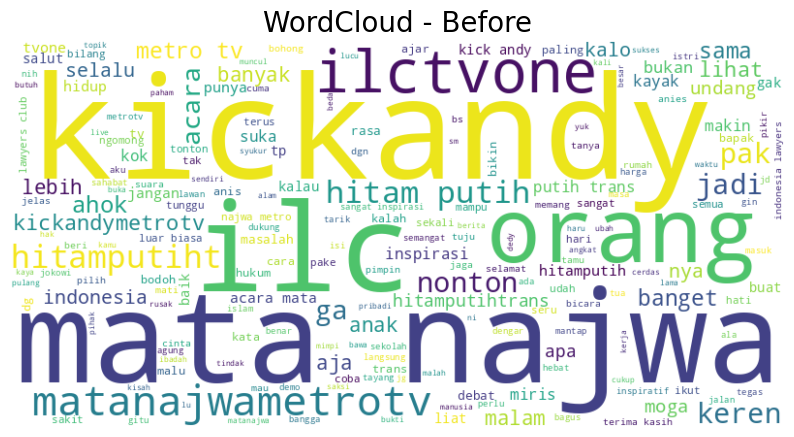

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, size=20)
    plt.axis('off')
    plt.show()

# Before: Teks mentah
generate_wordcloud(text['stemming'], 'WordCloud - Before')


## After Representasi Visualisasi WordCloud

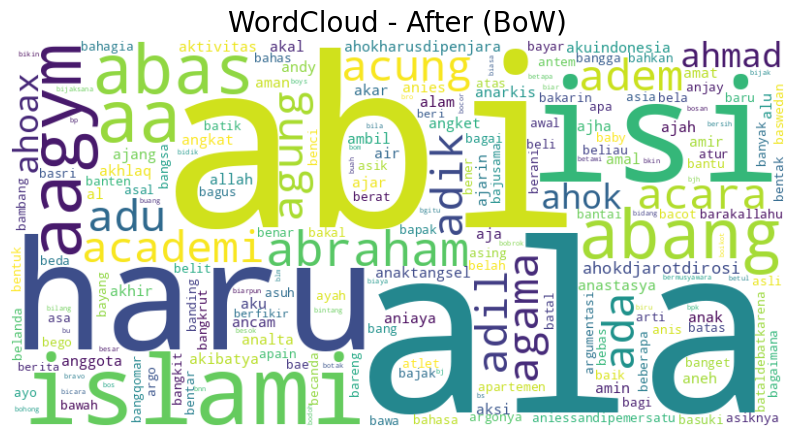

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Proses Bag-of-Words (BoW)
vectorizer_bow = CountVectorizer()
X_bow_wc = vectorizer_bow.fit_transform(text['stemming'])
bow_features = vectorizer_bow.get_feature_names_out()

# After: Visualisasi BoW
generate_wordcloud(bow_features, 'WordCloud - After (BoW)')


## Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y_bow, test_size=0.2, random_state=42)


##Pemodelan

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

nbModel = GaussianNB()
nbModel.fit(X_train_bow, y_train_bow)

GaussianNB()

##Classification Report

In [ ]:
y_pred_bow = nbModel.predict(X_test_bow)
print(classification_report(y_test_bow, y_pred_bow))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88        43
           1       0.83      0.92      0.87        37

    accuracy                           0.88        80
   macro avg       0.88      0.88      0.87        80
weighted avg       0.88      0.88      0.88        80



##Confusion Matrix

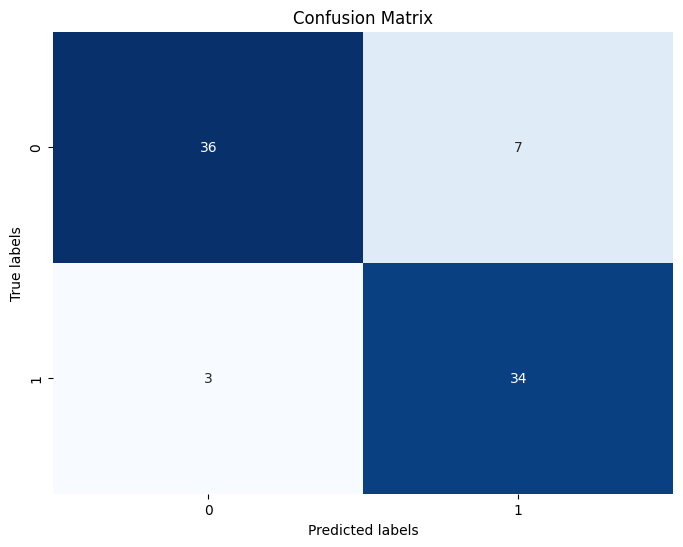

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_bow, y_pred_bow)

# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
!pip install wordcloud matplotlib

#2-Grams

##Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengkodekan label kategori menjadi bilangan bulat
df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])


In [ ]:
print(df['Sentiment'])

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: Sentiment, Length: 400, dtype: int64


##Feature Extrction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2, 2))

# Fit dan transform teks 'stemming' menggunakan CountVectorizer
X_2g = vectorizer.fit_transform(text['stemming'])

# Mengubah hasilnya menjadi array (jika diperlukan)
X_2g_array = X_2g.toarray()

# Mendefinisikan label atau target
y_2g = df['Sentiment']

## Before Representasi Visualisasi WordCloud

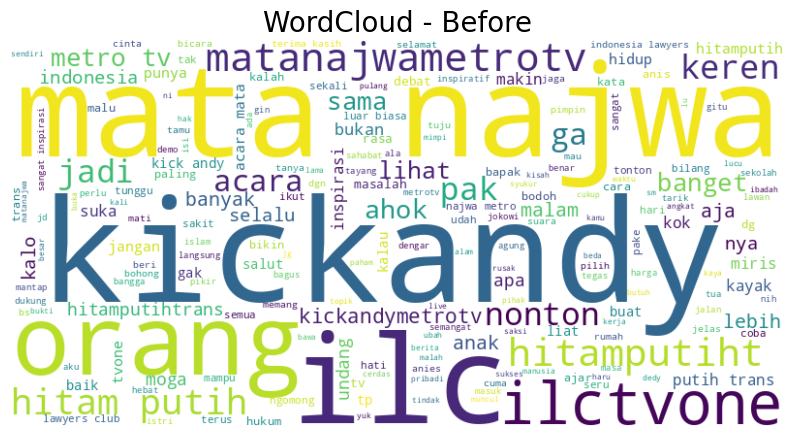

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, size=20)
    plt.axis('off')
    plt.show()

# Before: Teks mentah
generate_wordcloud(text['stemming'], 'WordCloud - Before')


## After Representasi Visualisasi WordCloud

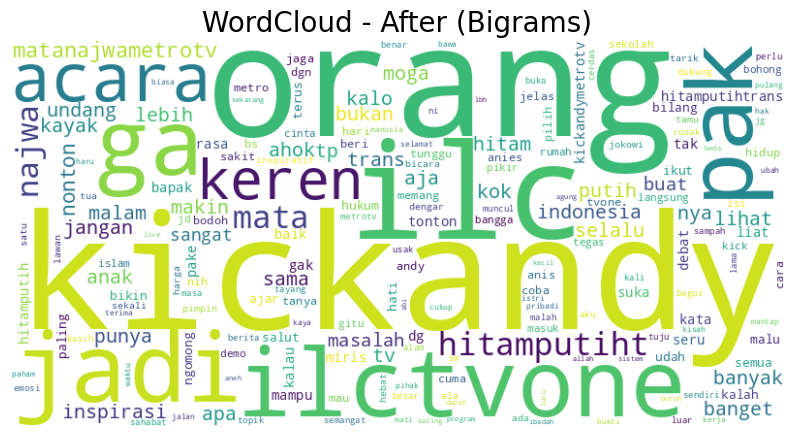

In [ ]:
vectorizer_bigram = CountVectorizer(ngram_range=(2, 2))
X_bigram = vectorizer_bigram.fit_transform(text['stemming'])
bigrams = vectorizer_bigram.get_feature_names_out()

# After: Visualisasi Bigram
generate_wordcloud(bigrams, 'WordCloud - After (Bigrams)')

##Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X_train_2g, X_test_2g, y_train_2g, y_test_2g = train_test_split(X_2g, y_2g, test_size=0.2, random_state=42)


##Pemodelan

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

nbModel = GaussianNB()

# Konversi X_train_2g menjadi dense array
X_train_2g_dense = X_train_2g.toarray()

# Melatih model dengan data yang telah diubah menjadi dense array
nbModel.fit(X_train_2g_dense, y_train_2g)

GaussianNB()

##Classification report

In [ ]:
X_test_2g_dense = X_test_2g.toarray()
y_pred_2g = nbModel.predict(X_test_2g_dense)

print(classification_report(y_test_2g, y_pred_2g))

              precision    recall  f1-score   support

           0       0.91      0.23      0.37        43
           1       0.52      0.97      0.68        37

    accuracy                           0.57        80
   macro avg       0.72      0.60      0.52        80
weighted avg       0.73      0.57      0.51        80



## Confusion Matrix

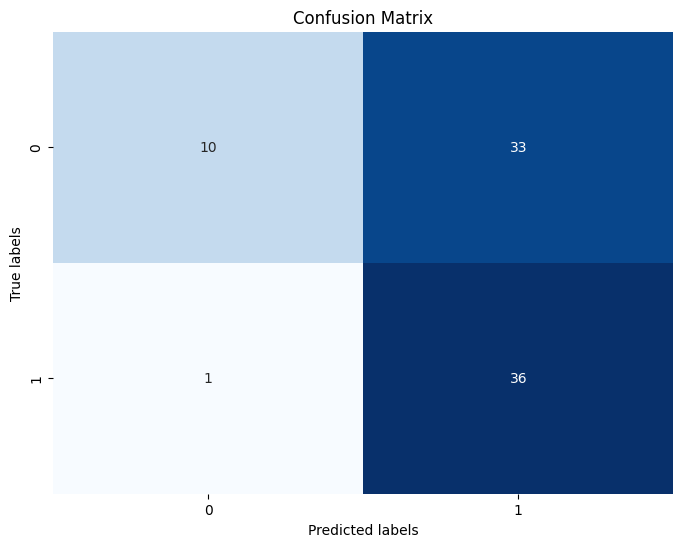

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_2g, y_pred_2g)

# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#3-Grams


##Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengkodekan label kategori menjadi bilangan bulat
df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])


In [ ]:
print(df['Sentiment'])

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: Sentiment, Length: 400, dtype: int64


## Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(3, 3))

# Fit dan transform teks 'stemming' menggunakan CountVectorizer
X_3g = vectorizer.fit_transform(text['stemming'])

# Mengubah hasilnya menjadi array (jika diperlukan)
X_3g_array = X_2g.toarray()

# Mendefinisikan label atau target
y_3g = df['Sentiment']

## Before Representasi Visualisasi WordCloud


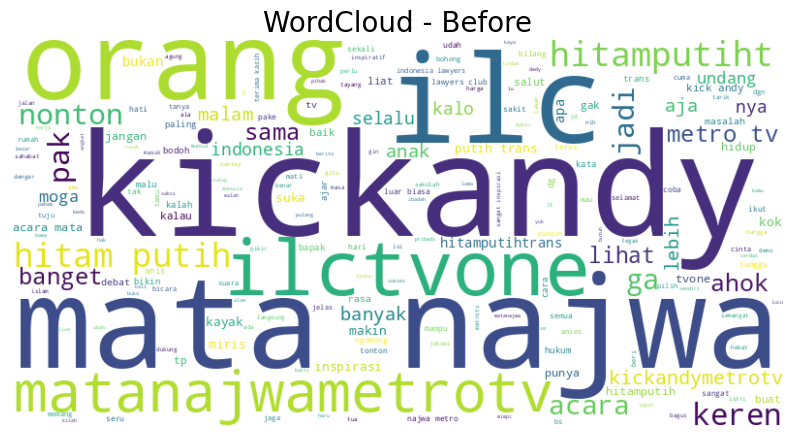

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, size=20)
    plt.axis('off')
    plt.show()

# Before: Teks mentah
generate_wordcloud(text['stemming'], 'WordCloud - Before')


## After Representasi Visualisasi WordCloud

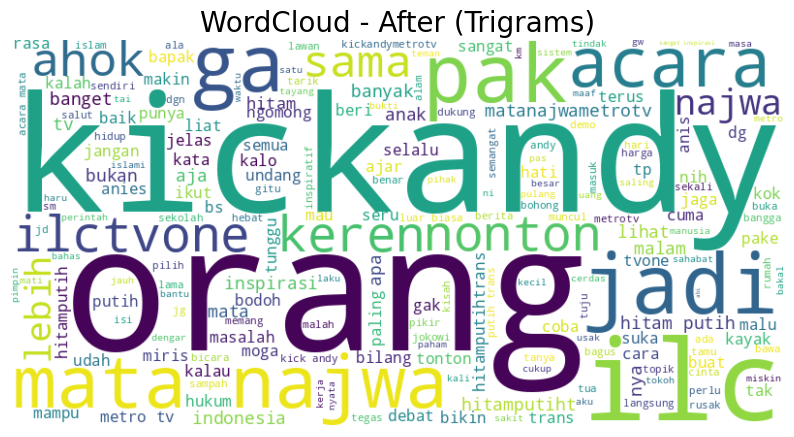

In [ ]:
vectorizer_trigram = CountVectorizer(ngram_range=(3, 3))
X_trigram = vectorizer_trigram.fit_transform(text['stemming'])
trigrams = vectorizer_trigram.get_feature_names_out()

# After: Visualisasi Trigrams
generate_wordcloud(trigrams, 'WordCloud - After (Trigrams)')

##Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X_train_3g, X_test_3g, y_train_3g, y_test_3g = train_test_split(X_3g, y_3g, test_size=0.2, random_state=42)


##Pemodelan

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

nbModel = GaussianNB()

# Konversi X_train_2g menjadi dense array
X_train_3g_dense = X_train_3g.toarray()

# Melatih model dengan data yang telah diubah menjadi dense array
nbModel.fit(X_train_3g_dense, y_train_3g)

GaussianNB()

##Classification report

In [ ]:
X_test_3g_dense = X_test_3g.toarray()

# Prediksi menggunakan model nbModel
y_pred_3g = nbModel.predict(X_test_3g_dense)

# Menampilkan classification report
print(classification_report(y_test_3g, y_pred_3g))

              precision    recall  f1-score   support

           0       1.00      0.09      0.17        43
           1       0.49      1.00      0.65        37

    accuracy                           0.51        80
   macro avg       0.74      0.55      0.41        80
weighted avg       0.76      0.51      0.39        80



## Confusion Matrix

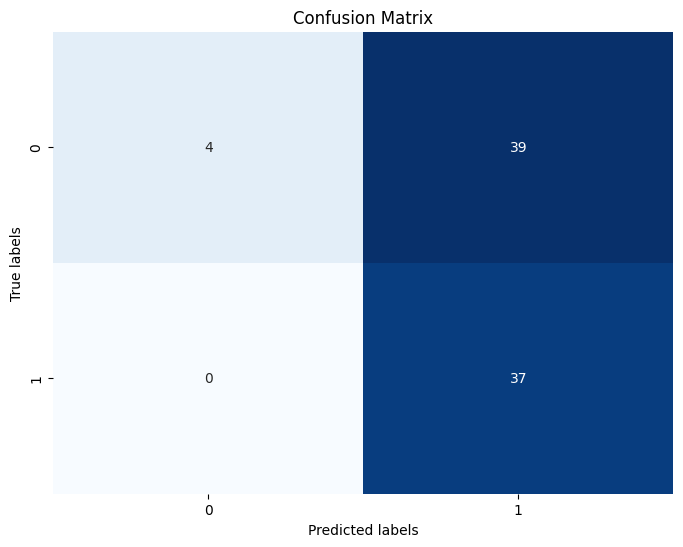

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_3g, y_pred_3g)

# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# TF-IDF

##Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengkodekan label kategori menjadi bilangan bulat
df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])


In [ ]:
print(df['Sentiment'])

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: Sentiment, Length: 400, dtype: int64


## Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(text['stemming']).toarray()
y_tfidf = df["Sentiment"]

## Before Representasi Visualisasi WordCloud

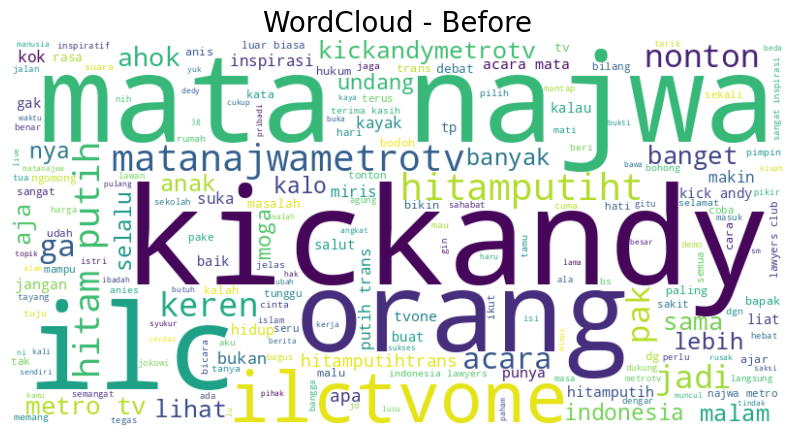

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, size=20)
    plt.axis('off')
    plt.show()

# Before: Teks mentah
generate_wordcloud(text['stemming'], 'WordCloud - Before')


## After Representasi Visualisasi WordCloud

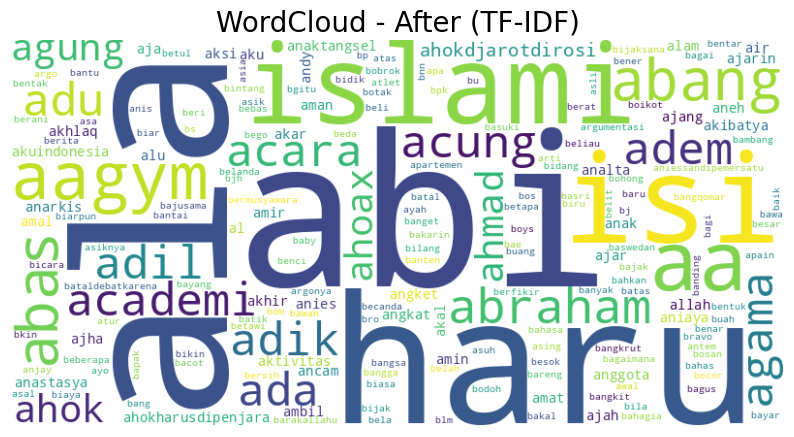

In [ ]:
# Proses TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_tfidf_wc = vectorizer_tfidf.fit_transform(text['stemming'])
tfidf_features = vectorizer_tfidf.get_feature_names_out()

# After: Visualisasi TF-IDF
generate_wordcloud(tfidf_features, 'WordCloud - After (TF-IDF)')

##Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=42)


##Pemodelan

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

nbModel = GaussianNB()

# Melatih model dengan data yang sudah dalam bentuk numpy array
nbModel.fit(X_train_tfidf, y_train_tfidf)


GaussianNB()

##Classfication report

In [ ]:
y_pred_tfidf = nbModel.predict(X_test_tfidf)
print(classification_report(y_test_tfidf, y_pred_tfidf))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        43
           1       0.83      0.81      0.82        37

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



##Confusion Matrix

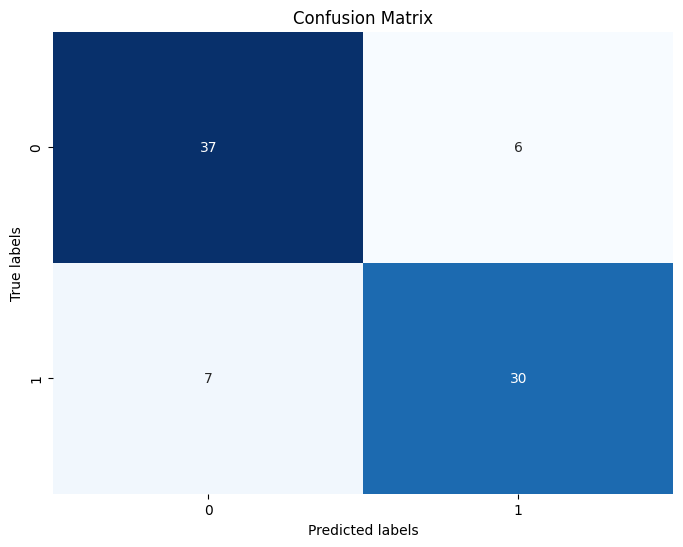

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_tfidf, y_pred_tfidf)

# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#Word2Vec

##Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengkodekan label kategori menjadi bilangan bulat
df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])


In [ ]:
print(df['Sentiment'])

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: Sentiment, Length: 400, dtype: int64


##Feature Extraction

In [ ]:
!pip install gensim

In [ ]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import numpy as np

# Sample corpus (assuming df['Text Tweet'] is your text data)
corpus = text['stemming'].tolist()

# Preprocess the corpus
processed_corpus = [simple_preprocess(doc) for doc in corpus]

# Train Word2Vec model
model = Word2Vec(processed_corpus, vector_size=100, window=5, min_count=1, sg=0)

# Get Word2Vec vectors for each document
X = []
for doc in processed_corpus:
    doc_vector = np.mean([model.wv[word] for word in doc if word in model.wv], axis=0)
    X.append(doc_vector)

# Convert list to numpy array
X_word2vec = np.array(X)

# Get the target variable (assuming df['Sentiment'] is your target)
y_word2vec = df['Sentiment']

# Print the shape of X and y (optional)
print("Shape of X_word2vec:", X_word2vec.shape)
print("Shape of y_word2vec:", y_word2vec.shape)

Shape of X_word2vec: (400, 100)
Shape of y_word2vec: (400,)


## Before Representasi Visualisasi WordCloud

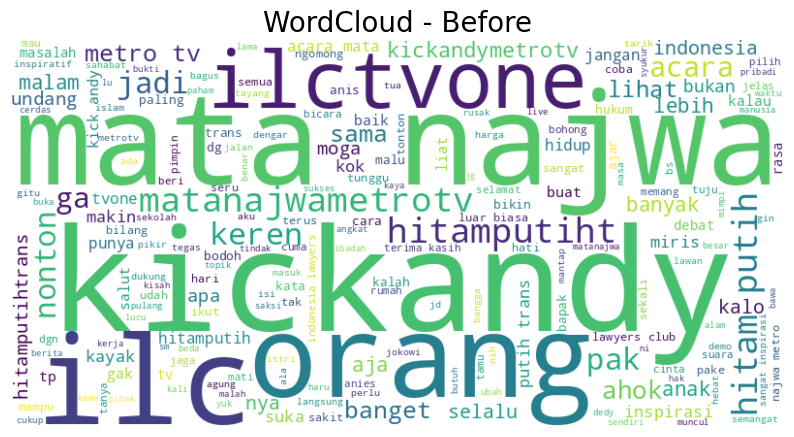

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, size=20)
    plt.axis('off')
    plt.show()

# Before: Teks mentah
generate_wordcloud(text['stemming'], 'WordCloud - Before')


## After Representasi Visualisasi WordCloud

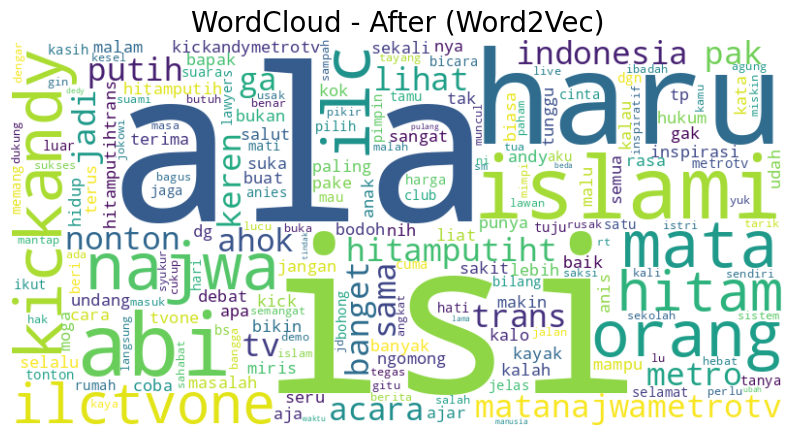

In [ ]:
# Tokenisasi data
tokenized_data = [sentence.split() for sentence in text['stemming']]

# Proses Word2Vec
model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

# Mendapatkan kata-kata yang paling umum berdasarkan frekuensi
word_counts = model.wv.index_to_key

# After: Visualisasi Word2Vec
generate_wordcloud(word_counts, 'WordCloud - After (Word2Vec)')

## Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(X_word2vec, y_word2vec, test_size=0.2, random_state=42)


##Classification Report

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Initialize Gaussian Naive Bayes model
nbModel = GaussianNB()

# Train the model
nbModel.fit(X_train_word2vec, y_train_word2vec)

GaussianNB()

In [ ]:
# Predict using the trained model
y_pred_word2vec = nbModel.predict(X_test_word2vec)

# Print classification report
print(classification_report(y_test_word2vec, y_pred_word2vec))

              precision    recall  f1-score   support

           0       0.65      0.72      0.68        43
           1       0.62      0.54      0.58        37

    accuracy                           0.64        80
   macro avg       0.64      0.63      0.63        80
weighted avg       0.64      0.64      0.63        80



## Confusion Matrix

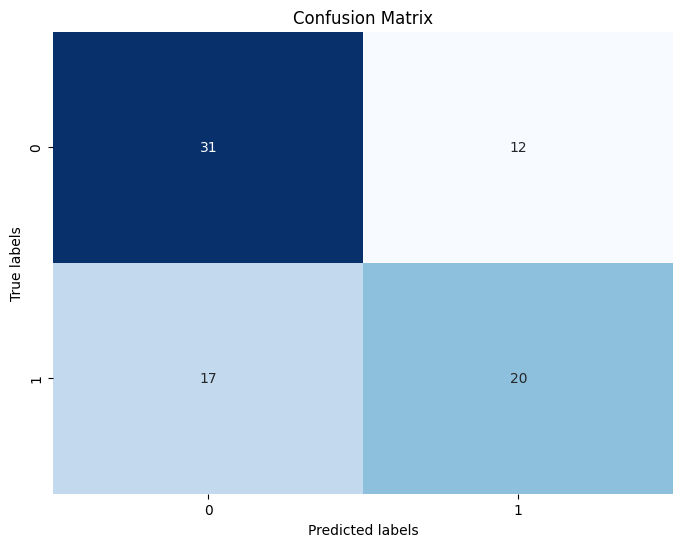

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_word2vec, y_pred_word2vec)

# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()